In [ ]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import MinMaxScaler

from nirs4all.dataset import DatasetConfigs
from nirs4all.operators.transformations import *
from nirs4all.pipeline import PipelineConfigs, PipelineRunner
from sklearn.ensemble import RandomForestRegressor

x_scaler = MinMaxScaler() # StandardScaler(), RobustScaler(), QuantileTransformer(), PowerTransformer(), LogTransform()
y_scaler = MinMaxScaler()
list_of_preprocessors = [ Detrend, FirstDerivative, SecondDerivative, Gaussian, StandardNormalVariate, SavitzkyGolay, Haar, MultiplicativeScatterCorrection]
splitting_strategy = ShuffleSplit(n_splits=3, test_size=.25)
dataset_folder = '../../sample_data/regression'

pipeline = [
    # "chart_2d",
    x_scaler,
    # "chart_3d",
    {"y_processing": y_scaler},
    {"feature_augmentation": { "_or_": list_of_preprocessors, "size":[1,(1,2)], "count":5 }}, # Generate all elements of size 1 and of order 1 or 2 (ie. "Gaussian", ["SavitzkyGolay", "Log"], etc.)
    splitting_strategy,
]

for i in range(10, 30, 10):
    model = {
        "name": f"PLS-{i}_cp",
        "model": PLSRegression(n_components=i)
    }
    pipeline.append(model)

pipeline_config = PipelineConfigs(pipeline, "pipeline_Q1")
dataset_config = DatasetConfigs(dataset_folder)

# Create pipeline with verbose=1 to see debug output
runner = PipelineRunner(save_files=True, verbose=0)
run_predictions, other_predictions = runner.run(pipeline_config, dataset_config)

🚀 Starting pipeline run with 5 pipeline configuration(s) on 1 dataset configuration(s) (5 total runs).
✅ Loaded dataset 'regression' with 130 training and 59 test samples.
📊 Dataset: regression
Features (samples=189, sources=1):
- Source 0: (189, 1, 2151), processings=['raw'], min=-0.265, max=1.436, mean=0.466, var=0.149)
Targets: (samples=189, targets=1, processings=['numeric'])
- numeric: min=1.33, max=128.31, mean=30.779
Indexes:
- "train", ['raw']: 130 samples
- "test", ['raw']: 59 samples
📥 Loaded 180 predictions from results\regression\regression_predictions.json
🚀 Starting pipeline config_pipeline_Q1_327134 on dataset regression
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
🔷 Step 1: {'class': 'sklearn.preprocessing._data.MinMaxScaler', '_runtime_instance': MinMaxScaler()}
🔹 Executing controller TransformerMixinController with

Top 10 models by MSE:
33 33
1. Real: PLS-10_cp_5_fold0 | Config: config_pipeline_Q1_17ae46 | RMSE: 12.376411
33 33
2. Real: PLS-20_cp_14_fold0 | Config: config_pipeline_Q1_17ae46 | RMSE: 13.387993
33 33
3. Real: PLS-10_cp_8_fold1 | Config: config_pipeline_Q1_327134 | RMSE: 14.426089
33 33
4. Real: PLS-20_cp_17_fold1 | Config: config_pipeline_Q1_327134 | RMSE: 15.193522
33 33
5. Real: PLS-10_cp_11_fold2 | Config: config_pipeline_Q1_17ae46 | RMSE: 16.907951
33 33
6. Real: PLS-20_cp_20_fold2 | Config: config_pipeline_Q1_dc00cf | RMSE: 16.962779
33 33
7. Real: PLS-10_cp_step5_w_avg | Config: config_pipeline_Q1_fcd8a0 | RMSE: 17.038728
33 33
8. Real: PLS-10_cp_step6_w_avg | Config: config_pipeline_Q1_fcd8a0 | RMSE: 17.038728
33 33
9. Real: PLS-20_cp_step6_w_avg | Config: config_pipeline_Q1_fcd8a0 | RMSE: 17.060156
33 33
10. Real: PLS-10_cp_step5_avg | Config: config_pipeline_Q1_fcd8a0 | RMSE: 17.841862


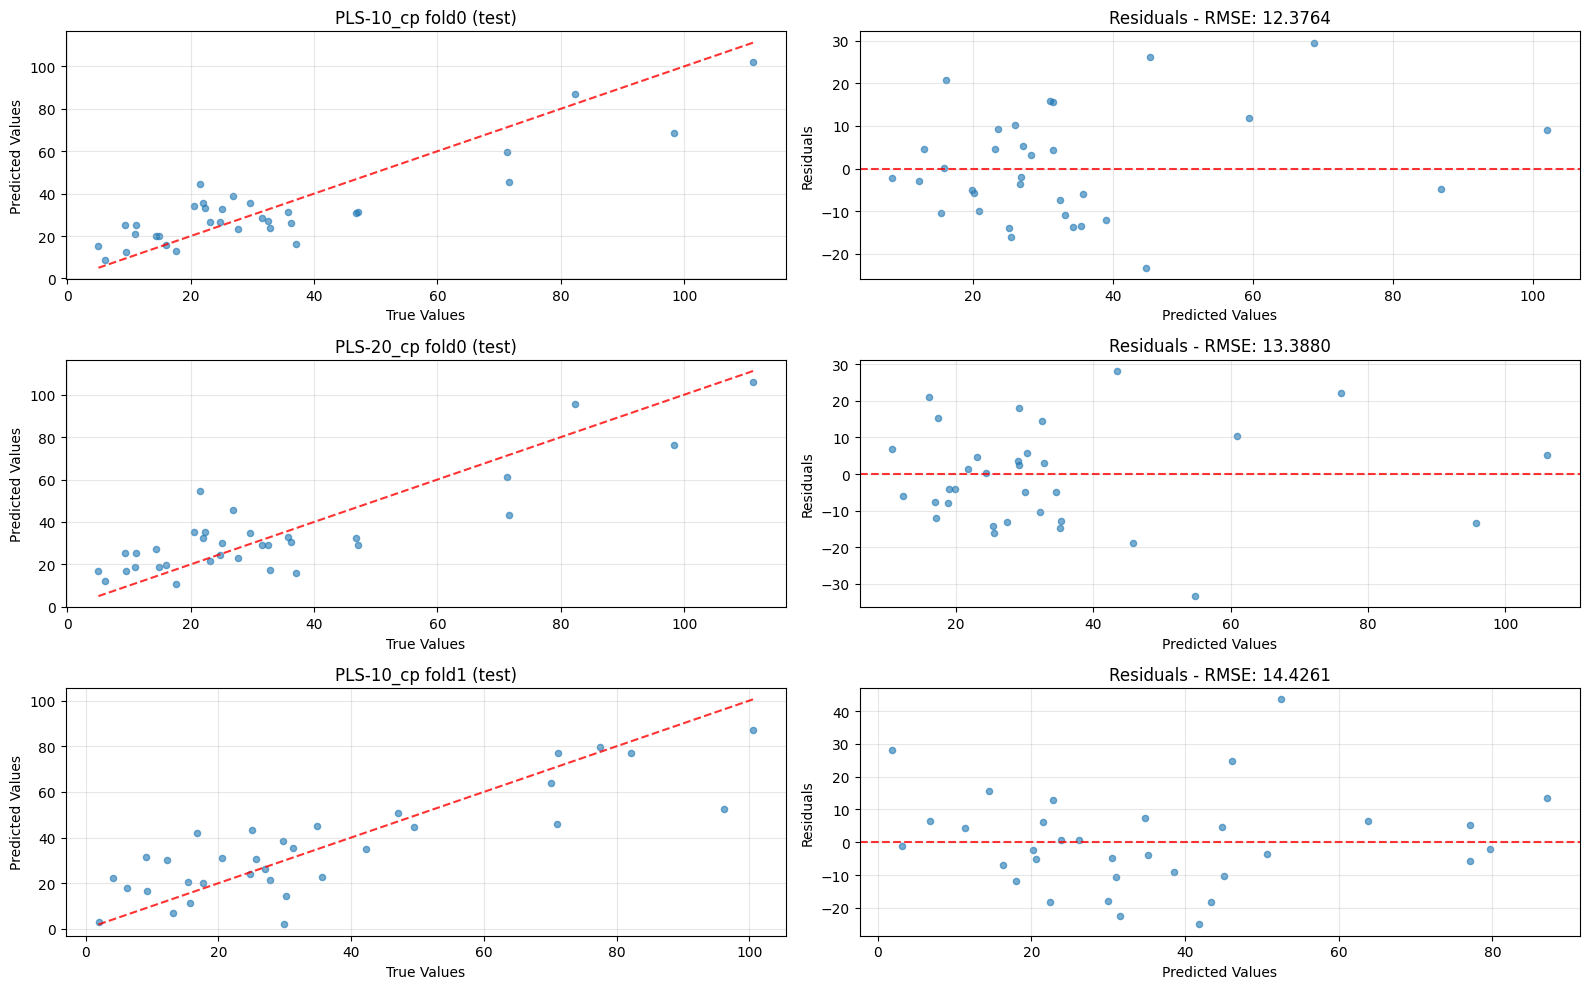

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from nirs4all.dataset.prediction_analyzer import PredictionAnalyzer

analyzer = PredictionAnalyzer(run_predictions)

# Get top models to verify the real model names are displayed correctly
top_10 = analyzer.get_top_k(10, 'mse')
print(f"Top 10 models by MSE:")
for i, model in enumerate(top_10, 1):
    real_model = model.get('real_model', 'unknown')
    enhanced_name = model.get('enhanced_model_name', 'unknown')
    pipeline_path = model.get('path', '')

    # Extract config ID from pipeline path
    config_id = "unknown"
    if 'config_' in pipeline_path:
        print(len(model["y_true"]), len(model["y_pred"]))
        config_part = pipeline_path.split('config_')[1].split('/')[0] if '/' in pipeline_path else pipeline_path.split('config_')[1]
        config_id = f"config_{config_part}"

    print(f"{i}. Real: {real_model} | Config: {config_id} | RMSE: {model['metrics']['rmse']:.6f}")

# Plot comparison with enhanced names (for readability in plots)
fig = analyzer.plot_top_k_comparison(k=3, metric='rmse', partition_type='test')
plt.show()

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import ShuffleSplit

from nirs4all.dataset import DatasetConfigs
from nirs4all.operators.transformations import *
from nirs4all.pipeline import PipelineConfigs, PipelineRunner

x_scaler = MinMaxScaler() # StandardScaler(), RobustScaler(), QuantileTransformer(), PowerTransformer(), LogTransform()
list_of_preprocessors = [ Detrend, FirstDerivative, SecondDerivative, Gaussian, StandardNormalVariate, SavitzkyGolay, Haar, MultiplicativeScatterCorrection]
splitting_strategy = ShuffleSplit(n_splits=3, test_size=.25)
dataset_folder = '../../sample_data/classification'

pipeline = [
    "chart_2d",
    x_scaler,
    "chart_3d",
    {"feature_augmentation": { "_or_": list_of_preprocessors, "size":[1,(1,2)], "count":5 }}, # Generate all elements of size 1 and of order 1 or 2 (ie. "Gaussian", ["SavitzkyGolay", "Log"], etc.)
    splitting_strategy,
]

for i in range(5, 20, 5):
    model = {
        "name": f"RF-depth-{i}",
        "model": RandomForestClassifier(max_depth=i)
    }
    pipeline.append(model)

pipeline_config = PipelineConfigs(pipeline, "pipeline_Q1")
dataset_config = DatasetConfigs(dataset_folder)

# Create pipeline
runner = PipelineRunner(save_files=False)
run_predictions, other_predictions = runner.run(pipeline_config, dataset_config)

In [ ]:
import numpy as np
from nirs4all.dataset.prediction_analyzer import PredictionAnalyzer

analyzer = PredictionAnalyzer(run_predictions)

top_5 = analyzer.get_top_k(5, 'accuracy')
for i, model in enumerate(top_5, 1):
    # Use enhanced_model_name which includes custom names when available
    enhanced_name = model.get('enhanced_model_name', model.get('real_model', 'unknown'))
    # canonical_name = model.get('canonical_model', 'unknown')
    pipeline_path = model.get('path', '')

    # Extract config ID from pipeline path or key
    config_id = "unknown"
    if 'config_' in pipeline_path:
        config_part = pipeline_path.split('config_')[1].split('/')[0] if '/' in pipeline_path else pipeline_path.split('config_')[1]
        config_id = f"config_{config_part}"

    print(f"{i}. {enhanced_name} - {config_id} - Accuracy: {model['metrics']['accuracy']:.6f}, F1: {model['metrics']['f1']:.6f}, Precision: {model['metrics']['precision']:.6f}, Recall: {model['metrics']['recall']:.6f}")

# Plot top_k comparison with enhanced names in titles
fig = analyzer.plot_top_k_confusionMatrix(k=3, metric='accuracy', partition_type='test')
plt.show()